Apply and understand the Naïve Bayes Classifier and Support Vector Machine (SVM) on spam SMS detection/spam email detection/bot detection. Interpret the results using suitable plots.


 First we will import all the modules that are required

In [29]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import feature_extraction



Load the data

In [30]:
df = pd.read_csv('spam.csv')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Renaming the columns



In [31]:
# get necessary columns for processing
df = df[['v2', 'v1']]
# df.rename(columns={'v2': 'messages', 'v1': 'label'}, inplace=True)
df = df.rename(columns={'v2': 'messages', 'v1': 'label'})
df.head()


,messages,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [32]:
df.groupby('label').describe()

messages                                                               
         count unique                                                top freq
label                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [33]:
df.head(8)

,messages,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
5,FreeMsg Hey there darling it's been 3 week's n...,spam
6,Even my brother is not like to speak with me. ...,ham
7,As per your request 'Melle Melle (Oru Minnamin...,ham


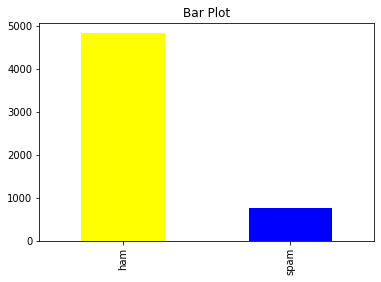

In [34]:
count_Class=pd.value_counts(df["label"], sort= True)
count_Class.plot(kind = 'bar',color = ["yellow","blue"])
plt.title('Bar Plot')
plt.show();

In [35]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(df["messages"])
np.shape(X)

(5572, 8357)

In [36]:
df["label"]=df["label"].map({'spam':1,'ham':0})
y = df['label']


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Implementing Naive Bayes


*   The bayes theorem is calculated on the conditional probability that the occurence of an event based on the previous knowledge of conditions that might be related to the event

*   It falls under the category of classification(under supervised learning)

*   It's simple,easy and fast to implement, uses less training data, handles both continous and discrete data,its higjly scalable with no of predictors and data points






In [38]:
from sklearn import naive_bayes
model = naive_bayes.MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [39]:
#Testing the model
y_pred=model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [40]:
#Confusion Matrix for Naive Bayes Classifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix : ")
print(cm)

Confusion Matrix : 
[[1420   22]
 [  13  217]]


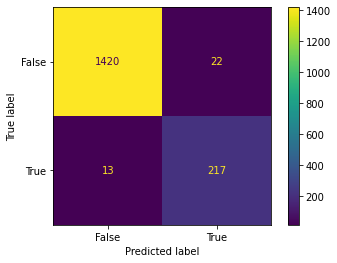

In [41]:
#Displaying the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels =[False,True])
cm_display.plot()
plt.show()

In [42]:
#Accuracy of Naive Bayes Classifier model
print("Accuracy of Naive Bayes classifier:",metrics.accuracy_score(y_test, y_pred))

Accuracy of Naive Bayes classifier: 0.979066985645933


In [43]:
#ROC curve for Naive Bayes Classifier
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Area under the curve:",roc_auc)

Area under the curve: 0.9641108363987216


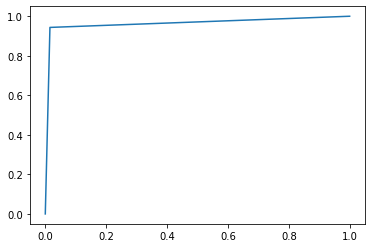

In [44]:
#Displaying the ROC curve 
plt.plot(false_positive_rate,true_positive_rate)

In [45]:
#Printing the classification report of Naive Bayes classifier model
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1442
           1       0.91      0.94      0.93       230

    accuracy                           0.98      1672
   macro avg       0.95      0.96      0.96      1672
weighted avg       0.98      0.98      0.98      1672



#Support Vector Machine Classifier

In [46]:
#Creating a SVC model
from sklearn.svm import SVC
svc_model = SVC() #initialize the code module
svc_model.fit(X_train,y_train)

SVC()

In [47]:
#Testing the model
y_pred1 = svc_model.predict(X_test)
print(y_pred1)

[0 0 0 ... 0 0 0]


In [48]:
#Confusion Matrix for Support Vector Machine classifier
cm1= confusion_matrix(y_test,y_pred1)
print("Confusion Matrix obtained: ")
print(cm1)

Confusion Matrix obtained: 
[[1441    1]
 [  48  182]]


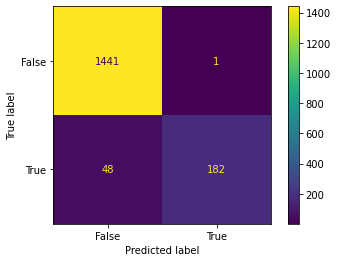

In [49]:
#Displaying the Confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels =[False,True])
cm_display.plot()
plt.show()

In [50]:
#Accuracy of SVC
print("Accuracy of SVM model:",metrics.accuracy_score(y_test, y_pred1))

Accuracy of SVM model: 0.9706937799043063


In [51]:
#ROC curve for SVC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Area under the curve:",roc_auc)

Area under the curve: 0.8953054332750406


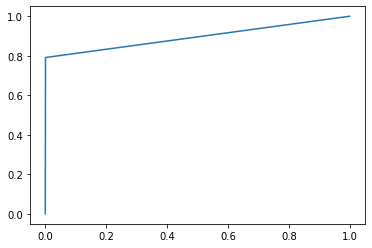

In [52]:
plt.plot(false_positive_rate,true_positive_rate)

In [53]:
#Printing the classification report of SVM classifier model
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1442
           1       0.99      0.79      0.88       230

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.93      1672
weighted avg       0.97      0.97      0.97      1672

